In [1]:
!wget https://raw.githubusercontent.com/Natasquad-Hack/NataSquad-AI-Hackathon/main/1_Machine_Learning/2_Time_Series_Forecasting/archive.zip

--2023-07-31 03:51:03--  https://raw.githubusercontent.com/Natasquad-Hack/NataSquad-AI-Hackathon/main/1_Machine_Learning/2_Time_Series_Forecasting/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18736648 (18M) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]  17.87M  --.-KB/s    in 0.1s    

2023-07-31 03:51:04 (169 MB/s) - ‘archive.zip’ saved [18736648/18736648]



In [2]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: historic_demand_2009_2023.csv  
  inflating: historic_demand_2009_2023_noNaN.csv  
  inflating: historic_demand_year_2009.csv  
  inflating: historic_demand_year_2010.csv  
  inflating: historic_demand_year_2011.csv  
  inflating: historic_demand_year_2012.csv  
  inflating: historic_demand_year_2013.csv  
  inflating: historic_demand_year_2014.csv  
  inflating: historic_demand_year_2015.csv  
  inflating: historic_demand_year_2016.csv  
  inflating: historic_demand_year_2017.csv  
  inflating: historic_demand_year_2018.csv  
  inflating: historic_demand_year_2019.csv  
  inflating: historic_demand_year_2020.csv  
  inflating: historic_demand_year_2021.csv  
  inflating: historic_demand_year_2022.csv  
  inflating: historic_demand_year_2023.csv  


In [3]:
# 1. Cargar y explorar los datos
import pandas as pd

df = pd.read_csv('/content/historic_demand_2009_2023_noNaN.csv')

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250194 entries, 0 to 250193
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   settlement_date            250194 non-null  object
 1   settlement_period          250194 non-null  int64 
 2   period_hour                250194 non-null  object
 3   nd                         250194 non-null  int64 
 4   tsd                        250194 non-null  int64 
 5   england_wales_demand       250194 non-null  int64 
 6   embedded_wind_generation   250194 non-null  int64 
 7   embedded_wind_capacity     250194 non-null  int64 
 8   embedded_solar_generation  250194 non-null  int64 
 9   embedded_solar_capacity    250194 non-null  int64 
 10  non_bm_stor                250194 non-null  int64 
 11  pump_storage_pumping       250194 non-null  int64 
 12  ifa_flow                   250194 non-null  int64 
 13  ifa2_flow                  250194 non-null  

,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
count,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000,250194.000000
mean,24.497242,31830.252924,33281.000795,28955.719937,1214.111070,4216.416317,798.006271,7775.123264,7.423176,320.470307,919.002234,11.460115,542.995539,-107.266953,-25.317638,151.336183,0.022638
std,13.851967,7772.990497,7568.625622,7046.881689,926.112486,1924.315223,1596.145771,5480.305258,41.288693,544.056120,1093.595345,308.067249,507.545181,223.066403,251.334752,388.191533,0.148748
min,1.000000,13367.000000,16629.000000,0.000000,0.000000,1403.000000,0.000000,0.000000,-24.000000,0.000000,-2056.000000,-1030.000000,-1215.000000,-505.000000,-585.000000,-1022.000000,0.000000
25%,12.000000,25620.000000,27268.000000,23298.000000,522.000000,2085.000000,0.000000,1829.000000,0.000000,8.000000,206.000000,0.000000,0.000000,-251.000000,-128.000000,0.000000,0.000000
50%,24.000000,31264.000000,32484.000000,28421.000000,973.000000,4163.000000,0.000000,9300.000000,0.000000,12.000000,1247.000000,0.000000,767.000000,-119.000000,0.000000,0.000000,0.000000
75%,36.000000,37540.000000,38704.000000,34176.000000,1651.000000,6192.000000,736.000000,13080.000000,0.000000,465.000000,1899.000000,0.000000,994.000000,46.000000,7.000000,0.000000,0.000000
max,48.000000,59095.000000,60147.000000,53325.000000,5354.000000,6574.000000,9830.000000,13861.000000,893.000000,2019.000000,2066.000000,1016.000000,1143.000000,499.000000,504.000000,1033.000000,1.000000


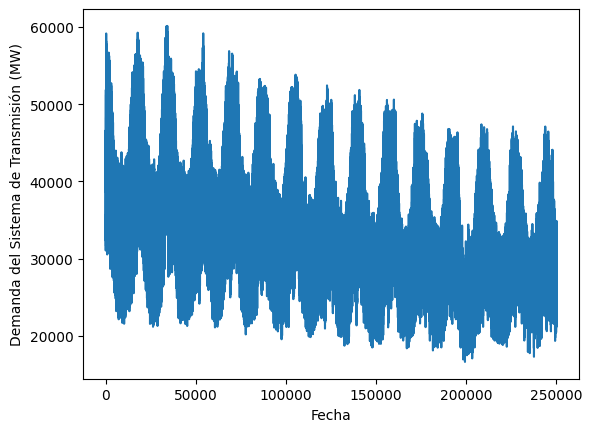

In [4]:
# Gráficos
import matplotlib.pyplot as plt

# Visualizar la serie temporal
plt.plot(df['tsd'])
plt.xlabel('Fecha')
plt.ylabel('Demanda del Sistema de Transmisión (MW)')
plt.show()


In [11]:
# 2. Preprocesamiento
from sklearn.preprocessing import StandardScaler

df['date'] = pd.to_datetime(df['settlement_date'])
df = df.set_index('date')

scaler = StandardScaler()
df[['tsd']] = scaler.fit_transform(df[['tsd']])

df['period_hour'] = pd.to_timedelta(df['period_hour'])
df['period_hour'] = df['period_hour'].dt.total_seconds()

In [12]:
# 3. Dividir datos
train = df.loc[df.index < '2023-01-01']
test = df.loc[df.index >= '2023-01-01']

In [13]:
# 4. Modelos
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X_train = train.drop('tsd', axis=1)
X_train = X_train.drop('settlement_date', axis=1)
y_train = train['tsd']

lr_model = LinearRegression()
lr_model.fit(X=X_train, y=y_train.astype(float))

scores = cross_val_score(lr_model, X_train, y_train, cv=5)
print(scores)

[0.99689787 0.9970051  0.99839275 0.99433832 0.95269693]


In [14]:
# Conjuntos para testear el modelo
X_test = test.drop('tsd', axis=1)
X_test = X_test.drop('settlement_date', axis=1)

y_test = test['tsd']

MSE: 0.008875494061472844
RMSE: 0.09420984057662365
MAE: 0.07986858028594537


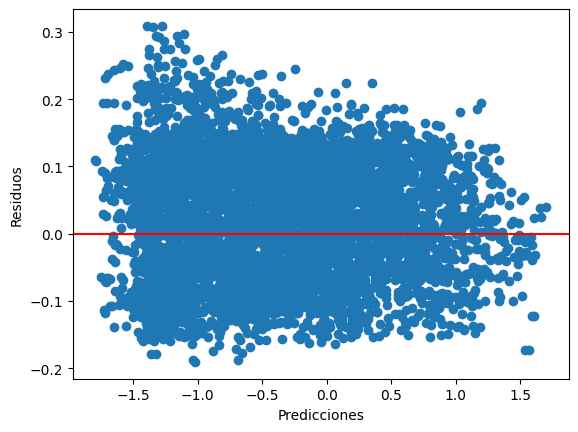

In [15]:
# Realizar predicciones en un conjunto de datos de prueba
y_pred = lr_model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando métricas de regresión
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

# Realizar un análisis de residuos
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()